In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = "D:\\coding\\data_en\\data\\processed\\Skytrain_data_Processed_20250121.csv"  # Replace with your file path
data = pd.read_csv(file_path)

In [13]:
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['time'])
data['Hour'] = data['Datetime'].dt.hour

def categorize_time(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

data['Daytime'] = data['Hour'].apply(categorize_time)

station_summary = data.groupby('station').agg(
    TotalEntering=('passengers_entering', 'sum'),
    TotalExiting=('passengers_exiting', 'sum')
).reset_index()

station_summary['NetPassengerFlow'] = (
    station_summary['TotalEntering'] - station_summary['TotalExiting']
)

daytime_summary = data.groupby(['Daytime']).agg(
    TotalPassengers=('passengers_entering', 'sum')
).reset_index()


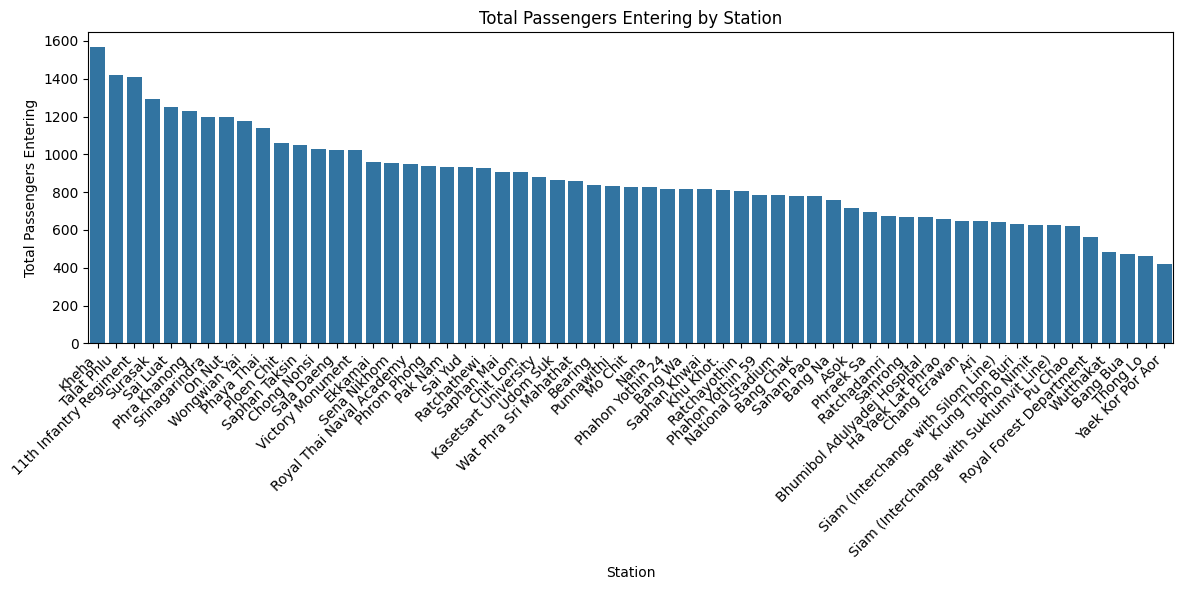

In [14]:
plt.figure(figsize=(12, 6))
sns.barplot(data=station_summary.sort_values('TotalEntering', ascending=False), x='station', y='TotalEntering')
plt.xticks(rotation=45, ha='right')
plt.title('Total Passengers Entering by Station')
plt.ylabel('Total Passengers Entering')
plt.xlabel('Station')
plt.tight_layout()
plt.show()

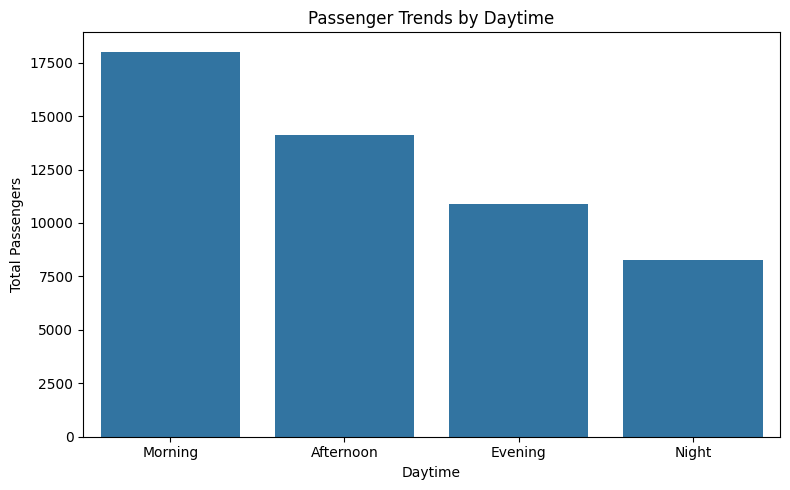

In [16]:
plt.figure(figsize=(8, 5))
sns.barplot(data=daytime_summary, x='Daytime', y='TotalPassengers', order=['Morning', 'Afternoon', 'Evening', 'Night'])
plt.title('Passenger Trends by Daytime')
plt.ylabel('Total Passengers')
plt.xlabel('Daytime')
plt.tight_layout()
plt.show()